<a href="https://colab.research.google.com/github/purvilmehta06/Deep-Learning/blob/master/Lab%208/LabAssignment8_201701073.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 8: Deep Learning


*   Lab Manual: [Manual Lab 8](https://github.com/purvilmehta06/Deep-Learning/blob/master/Lab%208/Lab_Assignment_8.pdf)
*   Author: Purvil Mehta
*   Id : 201701073
*   Github Link : [Deep Learning Course Lab Work Repo](https://github.com/purvilmehta06/Deep-Learning)


# Library Declaration 


In [2]:
from tensorflow.keras.layers import Dense, Activation
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dropout,Input, Dense, Layer, InputSpec, UpSampling2D, Reshape, BatchNormalization, Conv2D, MaxPooling2D, Flatten
import numpy as np
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.keras import regularizers
from tensorflow.keras import initializers
from keras import regularizers, activations, initializers,constraints, Sequential
from keras.constraints import UnitNorm, Constraint
from keras import backend as K

In [3]:
batchSize = 32
validationSplit = 0.2
epochs = 25
dropout = 0.5

# Loading - Normalising Data

In [4]:
(trainX, trainY), (testX, testY) = cifar10.load_data()
trainX = trainX.astype('float32')
testX = testX.astype('float32')
trainX = trainX / 255.0
testX = testX / 255.0

170500096/170498071 [==============================] - 4s 0us/step


# Supportive Functions 

In [5]:
def plot_figures(data,legend,title):
  for i in range(len(data)):
    plt.plot(data[i])
  plt.legend(legend)
  plt.title(title)
  plt.grid()

# Model 1

In [20]:
classTobeCheck = 0;
model1trainY = np.zeros(trainY.shape)
for i in range(len(trainY)):
  if(trainY[i,0] == classTobeCheck):
    model1trainY[i,0] = 1
model1testY = np.zeros((len(testY),1))
for i in range(len(testY)):
  if(testY[i,0] == classTobeCheck):
    model1testY[i,0] = 1
model1testY = to_categorical(model1testY)
model1trainY = to_categorical(model1trainY) 

In [28]:
def buildModel1(kernalSize,trainable=True):
  model = Sequential()
  model.add(Conv2D(32,(kernalSize,kernalSize),activation='relu',input_shape=(32,32,3),trainable=trainable))
  model.add(MaxPooling2D((2, 2)))  
  model.add(Flatten())
  model.add(Dense(512,activation='relu'))
  model.add(Dense(2, activation='softmax'))
  model.compile('RMSProp',loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [29]:
model_history1 = []
model1_1 = buildModel1(1)
model1_1.summary()
history = model1_1.fit(trainX, model1trainY, epochs=epochs, batch_size=batchSize, validation_data=(testX, model1testY), verbose=0)
print('Model with kernel size 1 is trained. Testing Acc: {}  Training Acc: {}'.format(history.history['val_accuracy'][epochs-1],history.history['accuracy'][epochs-1]))
model_history1.append(history)

model1_3 = buildModel1(3)
model1_3.summary()
history = model1_3.fit(trainX, model1trainY, epochs=epochs, batch_size=batchSize, validation_data=(testX, model1testY), verbose=0)
print('Model with kernel size 3 is trained. Testing Acc: {}  Training Acc: {}'.format(history.history['val_accuracy'][epochs-1],history.history['accuracy'][epochs-1]))
model_history1.append(history)

model1_5 = buildModel1(5)
model1_5.summary()
history = model1_5.fit(trainX, model1trainY, epochs=epochs, batch_size=batchSize, validation_data=(testX, model1testY), verbose=0)
print('Model with kernel size 5 is trained. Testing Acc: {}  Training Acc: {}'.format(history.history['val_accuracy'][epochs-1],history.history['accuracy'][epochs-1]))
model_history1.append(history)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 1026      
Total params: 4,195,970
Trainable params: 4,195,970
Non-trainable params: 0
_________________________________________________________________
Model with kernel size 1 is trained. Testing Acc: 0.9225999712944031  Training Acc: 0.9339799880981445
Model: 

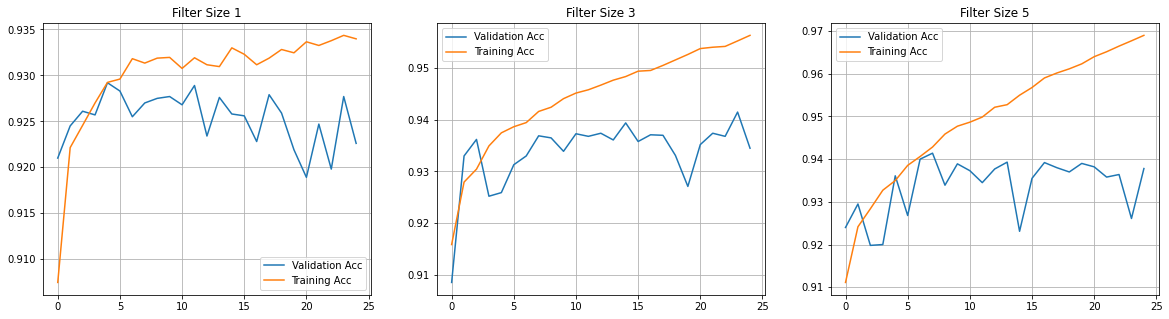

In [30]:
plt.figure(figsize=(20,5))
legend = ['Validation Acc','Training Acc']
titles = ['Filter Size 1','Filter Size 3','Filter Size 5']
for i in range(3):
  plt.subplot(1,3,i+1)
  plot_figures([model_history1[i].history['val_accuracy'],model_history1[i].history['accuracy']],legend,titles[i])
plt.show()

# Model 2

In [42]:
model2 = Sequential()
model2.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model2.add(Conv2D(128,(3,3),activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(dropout))
model2.add(Flatten())
model2.add(Dense(512,activation='relu'))
model2.add(Dense(2, activation='softmax'))
model2.compile('RMSProp',loss='categorical_crossentropy',metrics=['accuracy'])
history = model2.fit(trainX, model1trainY, epochs=epochs, batch_size=batchSize, validation_data=(testX, model1testY), verbose=0)
print('Model with kernel size 3 is trained. Testing Acc: {}  Training Acc: {}'.format(history.history['val_accuracy'][epochs-1],history.history['accuracy'][epochs-1]))

Model with kernel size 3 is trained. Testing Acc: 0.9332000017166138  Training Acc: 0.932200014591217


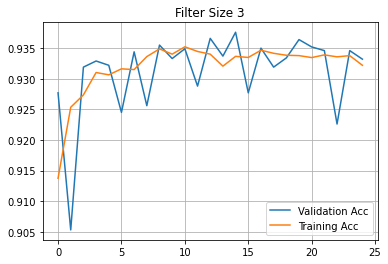

In [43]:
legend = ['Validation Acc','Training Acc']
titles = 'Filter Size 3'
plot_figures([history.history['val_accuracy'],history.history['accuracy']],legend,titles)
plt.show()

# Model 3

In [32]:
def buildModel3(trainable=True):
  model = Sequential()
  model.add(Conv2D(32,(5,5),activation='relu',padding='same',input_shape=(32,32,3),trainable=trainable))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(512,activation='relu'))
  model.add(Dense(8192,activation='relu'))
  model.add(Reshape((16,16,32)))
  model.add(UpSampling2D((2, 2)))
  model.add(Conv2D(3,(3,3),activation='sigmoid',padding='same'))
  model.compile('RMSProp',loss='mse',metrics=['mse'])
  return model

In [33]:
model3 = buildModel3()
model3.summary()
history = model3.fit(trainX, trainX, epochs=epochs, batch_size=batchSize, validation_data=(testX, testX), verbose=0)
print("Model is trained with training acc: {}".format(history.history['mse'][epochs-1]))

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dense_27 (Dense)             (None, 8192)              4202496   
_________________________________________________________________
reshape (Reshape)            (None, 16, 16, 32)        0         
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 32, 32, 32)      

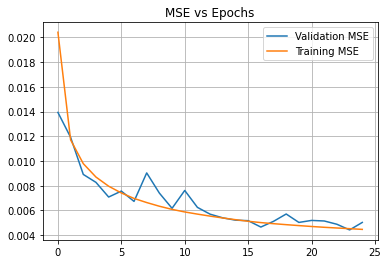

In [34]:
legend = ['Validation MSE','Training MSE']
titles = ['MSE vs Epochs']
plot_figures([history.history['val_mse'],history.history['mse']],legend,titles[0])
plt.show()

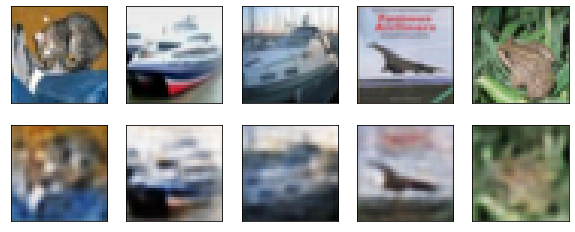

In [35]:
reconstructedImages = model3.predict(testX)
plt.figure(figsize=(10, 4))
n = 5
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(testX[i].reshape(32, 32,3))
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(reconstructedImages[i].reshape(32, 32,3))
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

# Model 4

Weigths are extracted
Weigths are loaded
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 7200)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 512)               3686912   
_________________________________________________________________
dense_25 (Dense)             (None, 2)                 1026      
Total params: 3,688,834
Trainable params: 3,687,938
Non-trainable params: 896
_________________________________________________________________
Model is trained. Testing Acc: 0.9343000054359436  Training Acc: 0

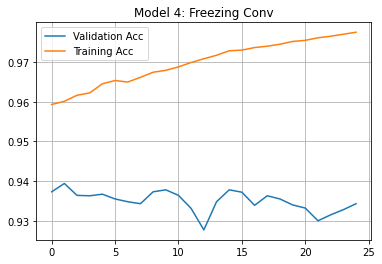

In [31]:
weights = model1_3.get_weights()
print("Weigths are extracted")
model4 = buildModel1(3,trainable=False)
model4.set_weights(weights)
print("Weigths are loaded")
model4.summary()
history = model4.fit(trainX, model1trainY, epochs=epochs, batch_size=batchSize, validation_data=(testX, model1testY), verbose=0)
print('Model is trained. Testing Acc: {}  Training Acc: {}'.format(history.history['val_accuracy'][epochs-1],history.history['accuracy'][epochs-1]))

legend = ['Validation Acc','Training Acc']
titles = 'Model 4: Freezing Conv'
plot_figures([history.history['val_accuracy'],history.history['accuracy']],legend,titles)
plt.show()

# Model 5

Model 3 weights are extracted.
Weigths are loaded
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_41 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dense_42 (Dense)             (None, 8192)              4202496   
_________________________________________________________________
reshape_5 (Reshape)          (None, 16, 16, 32)        0         
_________________________________________________________________
up_

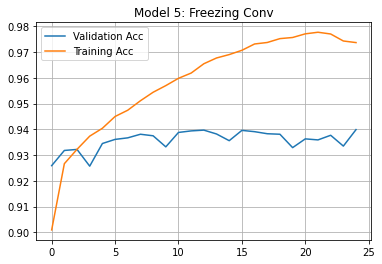

In [41]:
weights = model3.get_weights()
print("Model 3 weights are extracted.")
model5 = Sequential()
model5.add(Conv2D(32,(5,5),activation='relu',padding='same',input_shape=(32,32,3),trainable=False))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Flatten())
model5.add(Dense(512,activation='relu'))
model5.add(Dense(8192,activation='relu'))
model5.add(Reshape((16,16,32)))
model5.add(UpSampling2D((2, 2)))
model5.add(Conv2D(3,(3,3),activation='sigmoid',padding='same',trainable=False))
model5.set_weights(weights)
print("Weigths are loaded")
model5.add(Flatten())
model5.add(Dense(512,activation='relu'))
model5.add(Dense(2,activation='sigmoid'))
model5.summary()
model5.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
history = model5.fit(trainX, model1trainY, epochs=epochs, batch_size=batchSize, validation_data=(testX, model1testY), verbose=2)
print('Model is trained. Testing Acc: {}  Training Acc: {}'.format(history.history['val_accuracy'][epochs-1],history.history['accuracy'][epochs-1]))

legend = ['Validation Acc','Training Acc']
titles = 'Model 5: Freezing Conv'
plot_figures([history.history['val_accuracy'],history.history['accuracy']],legend,titles)
plt.show()

# Model 6

In [44]:
testY = to_categorical(testY)
trainY = to_categorical(trainY) 

Model 4 weights are extracted.
Model 4 weights are loaded successfully
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
dropout_10 (Dropout)         (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_25 (Flatten)         (None, 7200)              0         
_________________________________________________________________
dense_47 (Dense)             (None, 512)               3686912   
_________________________________________________________________
dense_48 (Dense)             (None, 2)                 1026      
________________________________________________

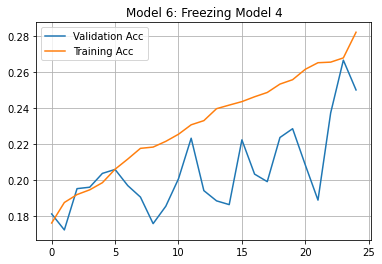

In [45]:
weights = model4.get_weights()
print("Model 4 weights are extracted.")
model6 = Sequential()
model6.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3),trainable=False))
model6.add(Dropout(dropout))
model6.add(MaxPooling2D((2, 2)))  
model6.add(Flatten())
model6.add(Dense(512,activation='relu'))
model6.add(Dense(2, activation='softmax'))
model6.set_weights(weights)
print("Model 4 weights are loaded successfully")
model6.add(Dense(10, activation='softmax'))
model6.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
model6.summary()
history = model6.fit(trainX, trainY, epochs=epochs, batch_size=batchSize, validation_data=(testX, testY), verbose=0)
print('Model is trained. Testing Acc: {}  Training Acc: {}'.format(history.history['val_accuracy'][epochs-1],history.history['accuracy'][epochs-1]))

legend = ['Validation Acc','Training Acc']
titles = 'Model 6: Freezing Model 4'
plot_figures([history.history['val_accuracy'],history.history['accuracy']],legend,titles)
plt.show()

# Best Configration

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 16, 16, 64)      

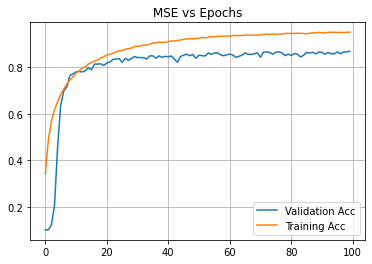

In [48]:
############################
######  PARAMETERS #########
############################
lemda = 1e-4 
epochs = 100
batchSize = 512
############################

model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(lemda),activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(lemda),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(lemda),activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(lemda),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(lemda),activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(lemda),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile('adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(trainX, trainY, epochs=epochs, batch_size=batchSize, validation_data=(testX, testY), verbose=0)
print('Model is trained. Testing Acc: {}  Training Acc: {}'.format(history.history['val_accuracy'][epochs-1],history.history['accuracy'][epochs-1]))

legend = ['Validation Acc','Training Acc']
titles = 'MSE vs Epochs'
plot_figures([history.history['val_accuracy'],history.history['accuracy']],legend,titles)
plt.show()